## BloomTech Data Science

---


# Ridge Regression
- Do one-hot encoding of categorical features
- Use scikit-learn to fit Ridge Regression models



In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.7 MB/s eta 0:00:00


In [3]:
# Model Building

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# For encoding categorical data
from category_encoders import OneHotEncoder

# I. Wrangle Data

Create **wrangle function** for **reproducibility**.

In [4]:
def wrangle(filepath):
  df = pd.read_csv(filepath,
                   parse_dates=['created'],
                   index_col='created').sort_index()

  # Remove outlier observations
  df = df[(df['price'] >= np.percentile(df['price'], 0.5)) &
          (df['price'] <= np.percentile(df['price'], 99.5)) &
          (df['latitude'] >= np.percentile(df['latitude'], 0.05)) &
          (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
          (df['longitude'] >= np.percentile(df['longitude'], 0.05)) &
          (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

  # Drop high-cardinality categorical variables


  return df

df = wrangle("https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/apartments/renthop-nyc.csv")

In [ ]:
# threshold = 10
# cols_to_drop = []
# for col in df:
#   if df[col].dtype == 'object':
#     if df[col].nunique() > threshold:
#       cols_to_drop.append(col)

# df.drop(columns=cols_to_drop, inplace=True)

In [5]:
cutoff = 90
drop_cols = [col for col in df.select_dtypes('object').columns
            if df[col].nunique() > cutoff]
df.drop(columns=drop_cols, inplace=True)

# II. Split Data

Split **target vector** from **feature matrix**.

In [6]:
target = 'price'
y = df[target]
X = df.drop(columns=target)

Split data into **training** and **test** sets.

(Use data from April & May 2016 to train. Use data from June 2016 to test.)

In [7]:
X.index.max(), X.index.min()

(Timestamp('2016-06-29 21:41:47'), Timestamp('2016-04-01 22:12:41'))

In [ ]:
# Several masks to choose from

# mask =
# mask =


In [8]:
# or apply the mask based on cut-off given below
cutoff = '2016-06-01'

mask = X.index < cutoff

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

In [9]:
X_train.shape, y_train.shape

((31844, 29), (31844,))

In [10]:
X_test.shape, y_test.shape

((16973, 29), (16973,))

# III. Establish Baseline

In [11]:
y_pred = [y_train.mean()] * len(y_train)
print('Mean price:', y_train.mean())
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Mean price: 3575.604007034292
Baseline MAE: 1201.8811133682555


# IV. Build Models

In [ ]:
# Step 1: Import your transformer class
# We did above ☝️

# Step 2: Insantiate your transformer
# ohe = OneHotEncoder(use_cat_names=True)

# Step 3: Fit your transformer
# ohe.fit(X_train)

# Step 4: Transform
# XT_train = ohe.transform(X_train)
# XT_test = ohe.transform(X_test)


In [ ]:
#model_r = Ridge(alpha=1.0)
#model_r.fit(XT_train, y_train)

Ridge()

In [ ]:
# model_lr = LinearRegression()
# model_lr.fit(X_train, y_train)

In [12]:
# The steps above aren't needed with the model pipeline function!

model_r = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge(alpha=1.0)
)

model_r.fit(X_train, y_train);

# V. Check Metrics

In [13]:
print('LR training MAE:', mean_absolute_error(y_train, model_r.predict(X_train)))
print('LR test MAE:', mean_absolute_error(y_test, model_r.predict(X_test)))

LR training MAE: 672.664072658999
LR test MAE: 675.5149089564139


In [14]:
print('Ridge training MAE:', mean_absolute_error(y_train, model_r.predict(X_train)))
print('Ridge test MAE:', mean_absolute_error(y_test, model_r.predict(X_test)))

Ridge training MAE: 672.664072658999
Ridge test MAE: 675.5149089564139


# Communicate results

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:362: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


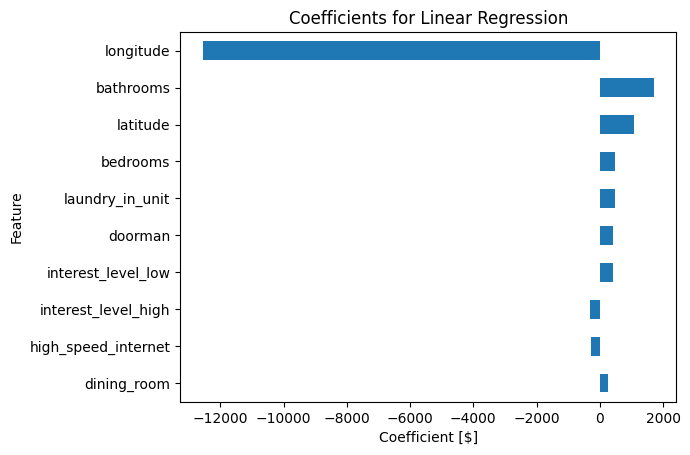

In [16]:
coefficients = model_r.named_steps['ridge'].coef_
features = model_r.named_steps['onehotencoder'].get_feature_names()

feat_imp = pd.Series(coefficients, index=features).sort_values(key=abs)
feat_imp.tail(10).plot(kind='barh')

plt.xlabel('Coefficient [$]')
plt.ylabel('Feature')
plt.title('Coefficients for Linear Regression');

In [ ]:
# import seaborn as sns
# sns.set(rc={'figure.figsize':(15,15)})
# sns.scatterplot('longitude', 'latitude', hue='price', data=df);


# VI. Tune Model

In [17]:
alphas = np.arange(1.0, 20.5, 0.5)

train_mae = []
test_mae = []


for a in alphas:
  model_r = make_pipeline(
      OneHotEncoder(use_cat_names=True),
      Ridge(alpha=a) #HYPERPARAMETER
  )

  model_r.fit(X_train, y_train)
  train_mae.append(mean_absolute_error(y_train, model_r.predict(X_train)))
  test_mae.append(mean_absolute_error(y_test, model_r.predict(X_test)))

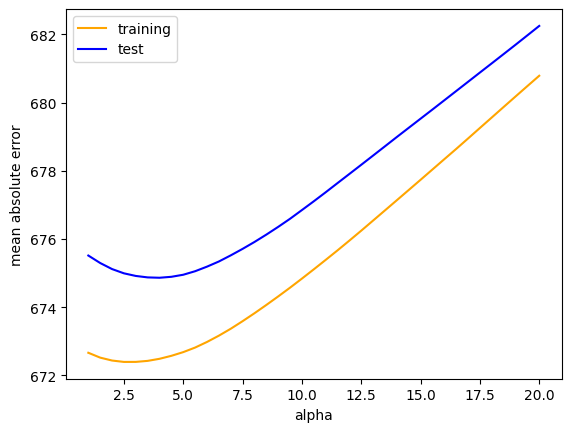

In [18]:
plt.plot(alphas, train_mae, color='orange', label='training')
plt.plot(alphas, test_mae, color='blue', label='test')
plt.xlabel('alpha')
plt.ylabel('mean absolute error')
plt.legend();